# Data retrieval

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
url = 'https://inshorts.com/en/read/world'

In [3]:
news_data = []

In [4]:
news_category = url.split('/')
news_category

['https:', '', 'inshorts.com', 'en', 'read', 'world']

In [5]:
news_category = news_category[-1]

In [6]:
news_category

'world'

# * Extracting data from the website

In [7]:
data = requests.get(url)  
data.content

b'<!doctype html><html lang="en"><head><meta charset="utf-8"/><link rel="dns-prefetch" href="https://ajax.googleapis.com"><link rel="dns-prefetch" href="https://assets.inshorts.com"><link rel="dns-prefetch" href="https://static.inshorts.com"><link rel="dns-prefetch" href="https://cdn.ampproject.org"><meta name="theme-color" content="#ffffff"><link rel="shortcut icon" href="/assets/images/favicon.png" type="image/x-icon"/><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/><meta name="viewport" content="width=device-width,initial-scale=1"/><meta http-equiv="X-UA-Compatible" content="IE=edge"/><link rel="icon" sizes="192x192" href="/assets/images/logo_192.png"/><link href="https://inshorts.com" rel="canonical" />\n  <link href="https://inshorts.com" rel="alternate"/>\n  <meta name="description" content="read latest news with inshorts in less than 60 words related to business sports bollywood and technology in india and around the world in both english  hindi"/>\n\n  <meta

# Parsing the content extracted from website into simple understandable structure using html.parser

In [8]:
soup = BeautifulSoup(data.content, 'html.parser')

In [9]:
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><link href="https://ajax.googleapis.com" rel="dns-prefetch"/><link href="https://assets.inshorts.com" rel="dns-prefetch"/><link href="https://static.inshorts.com" rel="dns-prefetch"/><link href="https://cdn.ampproject.org" rel="dns-prefetch"/><meta content="#ffffff" name="theme-color"/><link href="/assets/images/favicon.png" rel="shortcut icon" type="image/x-icon"><meta content="text/html; charset=utf-8" http-equiv="Content-Type"><meta content="width=device-width,initial-scale=1" name="viewport"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><link href="/assets/images/logo_192.png" rel="icon" sizes="192x192"><link href="https://inshorts.com" rel="canonical">
<link href="https://inshorts.com" rel="alternate">
<meta content="read latest news with inshorts in less than 60 words related to business sports bollywood and technology in india and around the world in both english  hindi" name="description"/>
<meta content="sum

In [10]:
type(soup)


bs4.BeautifulSoup

#  Id, Div, Span, Head

soup

news_articles = [{'news_headline': headline.find('span', attrs={'itemprop': 'headline'}).string,
                  'news_article': article.find('div', attrs={'itemprop': 'articleBody'}).string,
                  'news_category': news_category} 
                 for headline, article in zip(soup.find_all('div', 
                                                            class_ = ['news-card-title news-right-box']), 
                                              soup.find_all('div', class_=['news-card-content news-right-box']))]

news_articles = [{'news_headline': headline.find('span', attrs={'itemprop': 'headline'}).string,
                  'news_article': article.find('div', attrs={'itemprop': 'articleBody'}).string,
                  'news_category': news_category} 
                 for headline, article in zip(soup.find_all('span', 
                                                            class_ = ["ddVzQcwl2yPlFt4fteIE"]), 
                                              soup.find_all('div', class_=["KkupEonoVHxNv4A_D7UG"]))]

news_data.extend(news_articles)
news_data

df = pd.DataFrame(news_data)
df = df[['news_headline', 'news_article', 'news_category']]                                              

In [228]:
soup.find('span', attrs={'itemprop': 'headline'})

<span class="ddVzQcwl2yPlFt4fteIE" itemprop="headline">Russians dance to 'Main Nikla Gaddi Leke' to wish India on Republic Day</span>

In [12]:
soup.find_all('span', class_ = ["ddVzQcwl2yPlFt4fteIE"])

[<span class="ddVzQcwl2yPlFt4fteIE" itemprop="headline">What is Tower 22, US military base attacked in Jordan?</span>,
 <span class="ddVzQcwl2yPlFt4fteIE" itemprop="headline">Maldives lists top tourist markets, India falls below China to 5th spot</span>,
 <span class="ddVzQcwl2yPlFt4fteIE" itemprop="headline">Indian Navy rescues 19 Pakistanis from Somali pirates in Arabian Sea</span>,
 <span class="ddVzQcwl2yPlFt4fteIE" itemprop="headline">Toyota urges owners of 50,000 cars to stop driving after 26 deaths in US due to faulty airbags</span>,
 <span class="ddVzQcwl2yPlFt4fteIE" itemprop="headline">Brutal, heinous incident: India after 25-year-old Indian student Vivek murdered in US</span>,
 <span class="ddVzQcwl2yPlFt4fteIE" itemprop="headline">Indian student Neel found dead in US a day after his mother reported him missing</span>,
 <span class="ddVzQcwl2yPlFt4fteIE" itemprop="headline">Missing Indian Student of Purdue University Confirmed Dead</span>,
 <span class="ddVzQcwl2yPlFt4fteIE"

In [13]:
soup.find_all('div', attrs={'itemprop': 'articleBody'})

[<div class="KkupEonoVHxNv4A_D7UG" itemprop="articleBody">Three US troops were killed and dozens wounded after a drone hit 'Tower 22', a military outpost in Jordan. It holds a strategically important location in Jordan, at the most northeastern point where the country's borders meet Syria and Iraq. Tower 22 serves as a supply hub for the nearby US garrison of Al-Tanf located across the border in Syria.</div>,
 <div class="KkupEonoVHxNv4A_D7UG" itemprop="articleBody">India is no longer the top tourist market for Maldives, as per the latest data released by the nation, which has ranked Russia on top. Italy, China and the UK occupy the second, third and fourth spots on the list, respectively. Amid a diplomatic row, Indian tourists visiting Maldives dropped to 13,989 in January 2024.</div>,
 <div class="KkupEonoVHxNv4A_D7UG" itemprop="articleBody">The Indian Navy on Tuesday said INS Sumitra rescued 19 Pakistani crew members and a vessel from Somali pirates off the East Coast of Somalia. Th

for i in soup.find_all('span', class_="ddVzQcwl2yPlFt4fteIE"):
    print(i.find('span', attrs={'itemprop': 'headline'}))

for i in soup.find_all('span', class_="ddVzQcwl2yPlFt4fteIE"):
    # Corrected: Use 'i.find' instead of 'soup.find'
    print(i.find('span', attrs={'itemprop': 'headline'}))
    


In [255]:
import requests
from bs4 import BeautifulSoup
 
#url = "https://learnxinyminutes.com/docs/r"
url_get = requests.get(url)
soup = BeautifulSoup(url_get.content, 'lxml')
 
with open('url.txt', 'w', encoding='utf-8') as f_out:
    f_out.write(soup.prettify())

In [280]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Send request to the website
url = 'https://inshorts.com/en/read/world'
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Initialize a list to hold all news items
news_items = []

# Find all the headline elements
headline_elements = soup.find_all('span', class_="ddVzQcwl2yPlFt4fteIE")

for headline_element in headline_elements:
    # Extract the headline text
    headline = headline_element.get_text(strip=True)
    
    # Find the next sibling that is a div with the article text
    article_element = headline_element.find_next_sibling('div', class_="KkupEonoVHxNv4A_D7UG")
    article = article_element.get_text(strip=True) if article_element else ''

    # Append the data to the news_items list
    news_items.append({'headline': headline, 'article': article})

# Convert the list of dicts into a DataFrame
df = pd.DataFrame(news_items)

# Display the DataFrame
print(df)


                                            headline article
0  Russians dance to 'Main Nikla Gaddi Leke' to w...        
1  Macron shares selfie with PM from Hawa Mahal, ...        
2   Thales India Chief on India-France collaboration        
3  French President Macron to grace India’s 75th ...        
4  “Pakistan has long been epicentre of terrorism...        
5  PM Modi gifts replica of Ram Mandir to French ...        
6               JUST IN: ONDO tops $1bn trade volume        
7  Egypt Prez rejects phone call with Netanyahu a...        
8  18-yr-old Indian student found dead at US univ...        
9  4 ‘breakout’ DeFi trends to define crypto’s co...        


In [14]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [16]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Send request to the website
url = 'https://inshorts.com/en/read/world'
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find all headline elements
headlines = [headline.get_text(strip=True) for headline in soup.find_all('span', class_="ddVzQcwl2yPlFt4fteIE")]

# Find all article body elements
articles = [article.get_text(strip=True) for article in soup.find_all('div', class_="KkupEonoVHxNv4A_D7UG")]

# Combine headlines and articles into a DataFrame
df = pd.DataFrame({
    'headline': headlines,
    'article': articles
})

# Display the DataFrame
df.head()


,headline,article
0,"What is Tower 22, US military base attacked in...",Three US troops were killed and dozens wounded...
1,"Maldives lists top tourist markets, India fall...",India is no longer the top tourist market for ...
2,Indian Navy rescues 19 Pakistanis from Somali ...,The Indian Navy on Tuesday said INS Sumitra re...
3,"Toyota urges owners of 50,000 cars to stop dri...","Toyota is telling owners of about 50,000 older..."
4,"Brutal, heinous incident: India after 25-year-...",The Consulate General of India in the US' Atla...


In [17]:
df['news'] = news_category

In [18]:
df.rename(columns = {'news':'news_category'}, inplace=True)

In [19]:
df.shape

(10, 3)

In [20]:
df.head(3)

,headline,article,news_category
0,"What is Tower 22, US military base attacked in...",Three US troops were killed and dozens wounded...,world
1,"Maldives lists top tourist markets, India fall...",India is no longer the top tourist market for ...,world
2,Indian Navy rescues 19 Pakistanis from Somali ...,The Indian Navy on Tuesday said INS Sumitra re...,world


# Prepare user defined function to extract data from inshorts.com

In [21]:
urls_list = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world']

#  GL CODE - (OUTDATED)

In [298]:
def datasetPrepare(urls_list):
    news_data = []
    for url in urls_list:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        news_articles = [{'news_headline': headline.find('span', attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div', attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('div', class_=["ddVzQcwl2yPlFt4fteIE"]),
                                 soup.find_all('div', class_=["KkupEonoVHxNv4A_D7UG"]))
                        ]
        news_data.extend(news_articles) 
df_new =  pd.DataFrame(news_data)
df_new = df_new[['news_headline', 'news_article', 'news_category']]
return df_new 

# NEW CODE

In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def dataset_prepare(urls_list):
    news_data = []
    for url in urls_list:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')

        # Extract headlines and articles
        headlines = [headline.get_text(strip=True) for headline in soup.find_all('span', class_="ddVzQcwl2yPlFt4fteIE")]
        articles = [article.get_text(strip=True) for article in soup.find_all('div', class_="KkupEonoVHxNv4A_D7UG")]

        # Pair each headline with its corresponding article
        for headline, article in zip(headlines, articles):
            news_articles = {
                'news_headline': headline,
                'news_article': article,
                'news_category': news_category
            }
            news_data.append(news_articles)

    # Create DataFrame
    df_new = pd.DataFrame(news_data)
    df_new = df_new[['news_headline', 'news_article', 'news_category']]
    return df_new

# Example usage:
# urls_list = ['https://inshorts.com/en/read/world']
# df_new = dataset_prepare(urls_list)
# print(df_new.head())


df_new = datasetPrepare(urls_list)

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def dataset_prepare(urls_list):
    news_data = []
    for url in urls_list:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')

        # Find all the headline elements and the corresponding article texts
        headlines = soup.find_all('span', class_="ddVzQcwl2yPlFt4fteIE")
        articles = soup.find_all('div', class_="KkupEonoVHxNv4A_D7UG")

        # Ensure that we have the same number of headlines and articles before zipping
        if len(headlines) == len(articles):
            # Create a list of dictionaries with the extracted data
            news_articles = [{'news_headline': headline.get_text(strip=True), 
                              'news_article': article.get_text(strip=True), 
                              'news_category': news_category}
                             for headline, article in zip(headlines, articles)]

            # Extend the main news_data list with the newly extracted articles
            news_data.extend(news_articles)

    # Create DataFrame from the list of dictionaries
    # This ensures that the DataFrame columns are correctly named after the keys in the dictionaries
    df_new = pd.DataFrame(news_data)
    
    return df_new

# Example usage:
#urls_list = ['https://inshorts.com/en/read/world']
df_new = dataset_prepare(urls_list)
print(df_new.head())


                                       news_headline                                       news_article news_category
0  Troubling questions of AI remain a challenge: ...  Ahead of Interim Budget, Finance Ministry said...    technology
1       Move near office or quit: IBM to US managers  IBM asked US managers still working remotely t...    technology
2  First human received a brain implant from Neur...  Elon Musk's Neuralink has implanted one of its...    technology
3  iPhone 15 at Rs 61,500: Only 24 hours remainin...  The Apple iPhone 15 128GB now retails for an e...    technology
4  Stephen Hawking could communicate faster than ...  Elon Musk's startup Neuralink implanted brain ...    technology


In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   news_headline  30 non-null     object
 1   news_article   30 non-null     object
 2   news_category  30 non-null     object
dtypes: object(3)
memory usage: 852.0+ bytes


In [25]:
df_new.head(5)

,news_headline,news_article,news_category
0,Troubling questions of AI remain a challenge: ...,"Ahead of Interim Budget, Finance Ministry said...",technology
1,Move near office or quit: IBM to US managers,IBM asked US managers still working remotely t...,technology
2,First human received a brain implant from Neur...,Elon Musk's Neuralink has implanted one of its...,technology
3,"iPhone 15 at Rs 61,500: Only 24 hours remainin...",The Apple iPhone 15 128GB now retails for an e...,technology
4,Stephen Hawking could communicate faster than ...,Elon Musk's startup Neuralink implanted brain ...,technology


In [313]:
df_new.news_category.value_counts()

news_category
technology    10
sports        10
world         10
Name: count, dtype: int64

# Text Wrangling and Pre-processing

In [27]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

In [28]:
#nlp = spacy.load('en')

nlp = spacy.load("en_core_web_sm")

!python -m spacy download en_core_web_sm


In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\modza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

## Remove HTML tags

In [37]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

In [49]:
df.head(1)

,headline,article,news_category
0,"What is Tower 22, US military base attacked in...",Three US troops were killed and dozens wounded...,world


In [50]:
df['article'].apply(remove_accented_chars)

0    Three US troops were killed and dozens wounded...
1    India is no longer the top tourist market for ...
2    The Indian Navy on Tuesday said INS Sumitra re...
3    Toyota is telling owners of about 50,000 older...
4    The Consulate General of India in the US' Atla...
5    Indian student Neel Acharya, who had been miss...
6    An Indian student studying at Purdue Universit...
7    Prime Minister Narendra Modi took to social me...
8    Indian-American US Presidential candidate Nikk...
9    Thailand's economy is in a state of recession,...
Name: article, dtype: object

## Remove accented characters

In [41]:
u = "Zoë's café, located at 123 Main St., serves a variety of crêpes & smoothies! It's open daily from 8:00 am to 9:00 pm – a must-visit for food enthusiasts."

In [38]:
import  unicodedata

In [42]:
unicodedata.normalize('NFKD',u).encode('ascii','ignore').decode('utf-8', 'ignore')

"Zoe's cafe, located at 123 Main St., serves a variety of crepes & smoothies! It's open daily from 8:00 am to 9:00 pm  a must-visit for food enthusiasts."

In [53]:
#[w for w in words if w not in stopwords.words("english")]

for w in df['article']:
    if w not in nltk.corpus.stopwords.words("english"):
        print(w)

Three US troops were killed and dozens wounded after a drone hit 'Tower 22', a military outpost in Jordan. It holds a strategically important location in Jordan, at the most northeastern point where the country's borders meet Syria and Iraq. Tower 22 serves as a supply hub for the nearby US garrison of Al-Tanf located across the border in Syria.
India is no longer the top tourist market for Maldives, as per the latest data released by the nation, which has ranked Russia on top. Italy, China and the UK occupy the second, third and fourth spots on the list, respectively. Amid a diplomatic row, Indian tourists visiting Maldives dropped to 13,989 in January 2024.
The Indian Navy on Tuesday said INS Sumitra rescued 19 Pakistani crew members and a vessel from Somali pirates off the East Coast of Somalia. The Indian Navy rescued the fishing vessel Al Naeemi and her crew of 19 Pakistani nationals from 11 Somali pirates. This was the second successful anti-piracy operation by INS Sumitra in the

In [47]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

## Remove special characters

In [55]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [56]:
remove_special_characters("Well this was fun! What do you think? 123#@!", remove_digits=True)

'Well this was fun What do you think '

## Text lemmatization

In [57]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [58]:
lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'my system keep crash ! his crashed yesterday , ours crash daily'

## Text stemming

In [59]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'my system keep crash hi crash yesterday, our crash daili'

## Remove stopwords

In [60]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

## Building a text normalizer

In [61]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

## Pre-process and normalize news articles

In [62]:
df_new['full_text'] = df_new["news_headline"].map(str)+ '. ' + df_new["news_article"]

In [63]:
df_new['clean_text'] = normalize_corpus(df_new['full_text'])
norm_corpus = list(df_new['clean_text'])
df_new.iloc[1][['full_text', 'clean_text']].to_dict()

{'full_text': 'Move near office or quit: IBM to US managers. IBM asked US managers still working remotely to either move near an office or leave the company. All US managers must immediately report to an office or client location at least three days a week "regardless of current work location status", a company memo said. Managers who don\'t relocate by the start of August "must separate from IBM", it added.',
 'clean_text': 'move near office quit ibm us manager ibm ask manager still work remotely either move near office leave company us manager must immediately report office client location least three day week regardless current work location status company memo say manager not relocate start august must separate ibm add'}

# Save the news articles

In [64]:
df_new.to_csv('news.csv', index=False, encoding='utf-8')

# Tagging Parts of Speech

In [339]:
df_new = pd.read_csv('news.csv')

In [65]:
corpus = normalize_corpus(df_new['full_text'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

sentence = str(df_new.iloc[1].news_headline)
sentence_nlp = nlp(sentence)

In [68]:
sentence_nlp

Move near office or quit: IBM to US managers

In [66]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

,Word,POS tag,Tag type
0,Move,VB,VERB
1,near,IN,ADP
2,office,NN,NOUN
3,or,CC,CCONJ
4,quit,NN,NOUN
5,:,:,PUNCT
6,IBM,NNP,PROPN
7,to,IN,ADP
8,US,NNP,PROPN
9,managers,NNS,NOUN


In [69]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\modza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [343]:
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\modza\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [71]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\modza\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [72]:
nltk_pos_tagged = nltk.pos_tag(sentence.split())

In [73]:
nltk_pos_tagged

[('Move', 'NNP'),
 ('near', 'IN'),
 ('office', 'NN'),
 ('or', 'CC'),
 ('quit:', 'NN'),
 ('IBM', 'NNP'),
 ('to', 'TO'),
 ('US', 'NNP'),
 ('managers', 'NNS')]

In [74]:
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,Move,NNP
1,near,IN
2,office,NN
3,or,CC
4,quit:,NN
5,IBM,NNP
6,to,TO
7,US,NNP
8,managers,NNS


# Named Entity Recognition

In [75]:
sentence = str(df_new.iloc[1].full_text)

In [76]:
sentence

'Move near office or quit: IBM to US managers. IBM asked US managers still working remotely to either move near an office or leave the company. All US managers must immediately report to an office or client location at least three days a week "regardless of current work location status", a company memo said. Managers who don\'t relocate by the start of August "must separate from IBM", it added.'

In [77]:
sentence_nlp = nlp(sentence)

In [78]:
sentence_nlp

Move near office or quit: IBM to US managers. IBM asked US managers still working remotely to either move near an office or leave the company. All US managers must immediately report to an office or client location at least three days a week "regardless of current work location status", a company memo said. Managers who don't relocate by the start of August "must separate from IBM", it added.

In [79]:
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

[(IBM, 'ORG'), (US, 'GPE'), (IBM, 'ORG'), (US, 'GPE'), (US, 'GPE'), (at, 'DATE'), (least, 'DATE'), (three, 'DATE'), (days, 'DATE'), (the, 'DATE'), (start, 'DATE'), (of, 'DATE'), (August, 'DATE'), (IBM, 'ORG')]


In [71]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [72]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,US,Google,China,India,Trump,Pakistan,Apple,first,KXIP,two,six,KKR,IPL,Afghanistan,Pichai
Entity Type,GPE,ORG,GPE,GPE,ORG,GPE,ORG,ORDINAL,ORG,CARDINAL,CARDINAL,ORG,ORG,GPE,GPE
Frequency,36,17,15,15,9,8,8,8,8,8,7,7,7,6,6


In [73]:
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Type,ORG,PERSON,GPE,CARDINAL,DATE,NORP,ORDINAL,LOC,MONEY,PRODUCT,WORK_OF_ART,LAW,TIME,PERCENT,FAC
Frequency,214,153,137,82,65,44,21,13,8,7,4,2,1,1,1


# Emotion and Sentiment Analysis

In [74]:
from afinn import Afinn

In [75]:
af = Afinn()

In [76]:
sentiment_scores = [af.score(article) for article in corpus]

In [77]:
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [78]:
df = pd.DataFrame([list(df_new['news_category']), sentiment_scores, sentiment_category]).T

In [79]:
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']

In [80]:
df['sentiment_score'] = df.sentiment_score.astype('float')

In [81]:
df.groupby(by=['news_category']).describe()

sentiment_score                                                 
                        count      mean       std   min   25%  50%   75%   max
news_category                                                                 
sports                   24.0  2.416667  5.800425 -10.0 -1.25  2.5  5.25  12.0
technology               25.0 -0.280000  6.400000 -10.0 -5.00  0.0  4.00  14.0
world                    25.0 -1.920000  5.801724 -17.0 -5.00  0.0  2.00   6.0

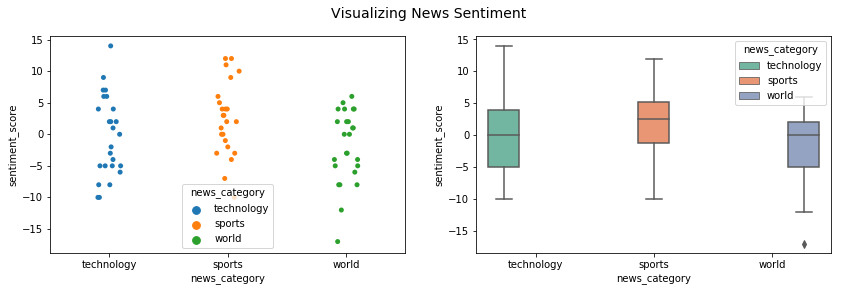

In [82]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score",  hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


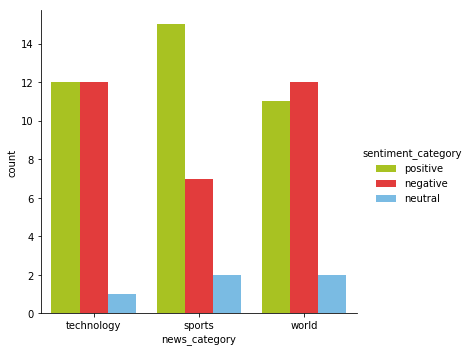

In [83]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [87]:
pos_idx = df[(df.news_category=='technology') & (df.sentiment_score == 2)].index[0]

In [89]:
neg_idx = df[(df.news_category=='technology') & (df.sentiment_score == -2)].index[0]

In [90]:
print('Most Negative Tech News Article:', df_new.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive Tech News Article:', df_new.iloc[pos_idx][['news_article']][0])

Most Negative Tech News Article: Elon Musk-led Tesla said it has built Asia's largest energy storage system at Osaka train station in Japan. The 7 MWh system with 42 Powerpack battery units can provide energy to move a train and its passengers for up to 30 minutes to the nearest station during a power failure, Tesla said, adding its hardware was installed in two days.

Most Positive Tech News Article: Facebook is introducing a new feature, 'Candidate Connect', to let 2019 Lok Sabha election candidates make 20-second videos to connect with voters. In the videos, to be grouped by constituencies, candidates will answer a set of questions, which Facebook said are outcomes of local consumer research. The videos will appear at the top of a user's 'News Feed'.


In [100]:
df1 = df[df.news_category=='world']
pd.unique(df1.sentiment_score)

array([ -4.,   4.,  -8.,   1.,   6.,  -3.,   0., -12.,   5.,   2.,  -5.,
       -17.,  -6.])

In [101]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score == 4)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score == -4.)].index[0]

print('Most Negative World News Article:', df_new.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', df_new.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: Pakistan has said it has examined the 22 pin locations of alleged training camps shared by India and said no such camps exist. "Pakistan is willing to allow visits, on request, to these locations," the statement added. It also stated that 54 people are being probed in connection with the Pulwama attack, but no link has been found so far.

Most Positive World News Article: The US Ambassador to Afghanistan, John R Bass, has criticised Pakistan PM Imran Khan over his comments suggesting Afghanistan should set up an interim government to facilitate US-Taliban talks. "Some aspects of cricket apply well in diplomacy, some do not. [It's] important to resist the temptation to ball-tamper with the Afghanistan peace process and its internal affairs," Bass tweeted.


In [102]:
from textblob import TextBlob

In [103]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in df_new['clean_text']]

In [104]:
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [105]:
df = pd.DataFrame([list(df_new['news_category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                                  \
                        count      mean       std   min    25%    50%     75%   
news_category                                                                   
sports                   24.0  0.109833  0.264403 -0.60  0.037  0.100  0.2525   
technology               25.0  0.079640  0.160765 -0.25 -0.019  0.067  0.1500   
world                    25.0  0.010960  0.199371 -0.80 -0.044  0.050  0.0830   

                      
                 max  
news_category         
sports         0.767  
technology     0.533  
world          0.350

In [106]:
df.head()

,news_category,sentiment_score,sentiment_category
0,technology,0.069,positive
1,technology,0.533,positive
2,technology,-0.040,negative
3,technology,-0.025,negative
4,technology,0.053,positive


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


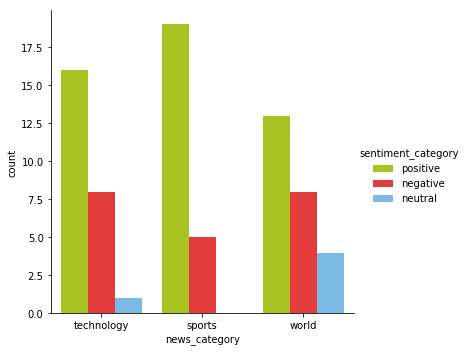

In [107]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [108]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score > 0.)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score < -0.)].index[0]

print('Most Negative World News Article:', df_new.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', df_new.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: The US Ambassador to Afghanistan, John R Bass, has criticised Pakistan PM Imran Khan over his comments suggesting Afghanistan should set up an interim government to facilitate US-Taliban talks. "Some aspects of cricket apply well in diplomacy, some do not. [It's] important to resist the temptation to ball-tamper with the Afghanistan peace process and its internal affairs," Bass tweeted.

Most Positive World News Article: Pakistan has said it has examined the 22 pin locations of alleged training camps shared by India and said no such camps exist. "Pakistan is willing to allow visits, on request, to these locations," the statement added. It also stated that 54 people are being probed in connection with the Pulwama attack, but no link has been found so far.


In [109]:
import model_evaluation_utils as meu
meu.display_confusion_matrix_pretty(true_labels=sentiment_category, 
                                    predicted_labels=sentiment_category_tb, 
                                    classes=['negative', 'neutral', 'positive'])

D:\courses\PGPAIML\statisticalNLP\aimlBlrSept2018\model_evaluation_utils.py:76: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
D:\courses\PGPAIML\statisticalNLP\aimlBlrSept2018\model_evaluation_utils.py:78: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


Predicted:                 
                   negative neutral positive
Actual: negative         14       2       15
        neutral           0       1        4
        positive          7       2       29